In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve
pd.set_option("display.max_rows", 300, "display.max_columns", 300)
import math

from sklearn import tree
import graphviz 
import matplotlib.pyplot as plt

# Tabular Data Cleaning & Exploring

In [2]:
train_df = pd.read_csv("train.csv")
pet_df = train_df.copy() # manipulate a copy

In [3]:
pet_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
# Looking at unique values (spot abnormal inputs)

for col in pet_df.columns:
    x = pet_df[col].unique()
    print(col + ': '+str(len(x)))
    if len(x) < 20:
        print(sorted(x))
# Note: 14993 total entries

Type: 2
[1, 2]
Name: 9061
Age: 106
Breed1: 176
Breed2: 135
Gender: 3
[1, 2, 3]
Color1: 7
[1, 2, 3, 4, 5, 6, 7]
Color2: 7
[0, 2, 3, 4, 5, 6, 7]
Color3: 6
[0, 3, 4, 5, 6, 7]
MaturitySize: 4
[1, 2, 3, 4]
FurLength: 3
[1, 2, 3]
Vaccinated: 3
[1, 2, 3]
Dewormed: 3
[1, 2, 3]
Sterilized: 3
[1, 2, 3]
Health: 3
[1, 2, 3]
Quantity: 19
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]
Fee: 74
State: 14
[41324, 41325, 41326, 41327, 41330, 41332, 41335, 41336, 41342, 41345, 41361, 41367, 41401, 41415]
RescuerID: 5595
VideoAmt: 9
[0, 1, 2, 3, 4, 5, 6, 7, 8]
Description: 14033
PetID: 14993
PhotoAmt: 31
AdoptionSpeed: 5
[0, 1, 2, 3, 4]


In [5]:
# To simplify the dataset, we will only consider profiles 
# of a singular pet instead of multiples

pet_df = pet_df[pet_df['Quantity'] < 2].drop('Quantity',axis=1)

len(pet_df) # still retain a healthy amount of data

11565

In [6]:
# Unimportant variables dropped

pet_df = pet_df.drop("Name", axis = 1) # Name dropped
pet_df = pet_df.drop("RescuerID", axis = 1) # RescuerID dropped
pet_df = pet_df.drop("Description", axis = 1) # Description dropped
pet_df = pet_df.drop("PetID", axis = 1) # PetID dropped
pet_df = pet_df.drop("State", axis = 1) # State dropped
pet_df = pet_df.drop("Color1", axis = 1)
pet_df = pet_df.drop("Color2", axis = 1)
pet_df = pet_df.drop("Color3", axis = 1) # colors dropped

In [7]:
# convert labels to binary
test_df = pet_df.assign(y = [1 if a < 3 else 0 for a in pet_df["AdoptionSpeed"]]).drop("AdoptionSpeed",axis=1)

#0 - Pet was adopted on the same day as it was listed.
#1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
#2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
#3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
#4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

In [8]:
print(
    "Number of Non-Adopted Pets: ",
    len(test_df.query('y==0')),
    "\nNumber of Adopted Pets: ",
    len(test_df.query('y==1')),
)

Number of Non-Adopted Pets:  5632 
Number of Adopted Pets:  5933


# Section 4.1: Data Manipulation (Decision Trees)

In [9]:
test_df.head() # relook at head of data

,Type,Age,Breed1,Breed2,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,VideoAmt,PhotoAmt,y
0,2,3,299,0,1,1,1,2,2,2,1,100,0,1.0,1
1,2,1,265,0,1,2,2,3,3,3,1,0,0,2.0,1
2,1,1,307,0,1,2,2,1,1,2,1,0,0,7.0,0
3,1,4,307,0,2,2,1,1,1,2,1,150,0,8.0,1
4,1,1,307,0,1,2,1,2,2,2,1,0,0,3.0,1


In [10]:
# Reduce dimensionality of breed1 breed2: check if purebreed or not
test_df = test_df.assign(purebreed = [1 if a == 0 else 0 for a in pet_df["Breed2"]]).drop(["Breed1","Breed2"],axis=1)

In [11]:
# Breaking VideoAmt into quantiles (continuous)
q1 = test_df['VideoAmt'].quantile(0.25)
q2 = test_df['VideoAmt'].quantile(0.50)
q3 = test_df['VideoAmt'].quantile(0.75)
test_df = test_df.assign(video_cat = [0 if a <=q1 else(1 if a <= q2 else(2 if a <= q3 else 3)) for a in pet_df["VideoAmt"]]).drop("VideoAmt",axis=1)

In [12]:
# Breaking Fee into quantiles
# We realized that majority of pets have 0 fee (more than 75%)
# hence, this is treated as a binary split (has fee vs no fee)

q1 = test_df['Fee'].quantile(0.25)
q2 = test_df['Fee'].quantile(0.50)
q3 = test_df['Fee'].quantile(0.75)
test_df = test_df.assign(fee_cat = [0 if a <=q1 else(1 if a <= q2 else(2 if a <= q3 else 3)) for a in pet_df["Fee"]]).drop("Fee",axis=1)

In [13]:
test_df= test_df.assign(unknown_sterilized = [1 if a == 3 else 0 for a in pet_df["Sterilized"]])

In [14]:
test_df = test_df.assign(is_sterilized = [1 if a == 1 else 0 for a in pet_df["Sterilized"]]).drop("Sterilized",axis=1)

In [15]:
# Breaking Age into intervals
# give earlier ages more intricate intervals
cut_labels = [0, 1, 2, 3, 4, 5]
cut_bins = [0, 1, 2, 3, 6, 12, 300]
# [0-1] month old: given 0
# (1-2] months old: given 1
# (2-3] months old: given 2
# (3-6] months old: given 3
# (6-12] months old: given 4,   4 and below: less than 1 year old
# (12 and above] months old: given 5
test_df['Age'] = pd.cut(test_df['Age'], bins=cut_bins, labels=cut_labels,
                       include_lowest = True)

In [16]:
test_df.head()

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Health,PhotoAmt,y,purebreed,video_cat,fee_cat,unknown_sterilized,is_sterilized
0,2,2,1,1,1,2,2,1,1.0,1,1,0,3,0,0
1,2,0,1,2,2,3,3,1,2.0,1,1,0,0,1,0
2,1,0,1,2,2,1,1,1,7.0,0,1,0,0,0,0
3,1,3,2,2,1,1,1,1,8.0,1,1,0,3,0,0
4,1,0,1,2,1,2,2,1,3.0,1,1,0,0,0,0


In [17]:
# Splitting data into dogs == 1 and cats == 2

dog_df = test_df.query('Type==1').drop("Type",axis=1)
cat_df = test_df.query('Type==2').drop("Type",axis=1)

In [18]:
dog_df['y'].value_counts().to_frame()

,y
0,3485
1,3137


In [19]:
cat_df['y'].value_counts().to_frame()

,y
1,2796
0,2147


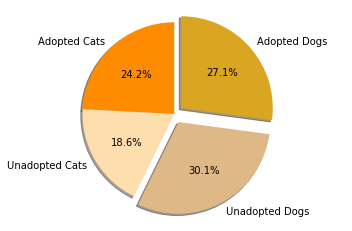

In [20]:
labels = ['Adopted Cats', 'Unadopted Cats', 'Unadopted Dogs', 'Adopted Dogs']
sizes = [cat_df['y'].value_counts()[1]/len(test_df) * 100,  
         cat_df['y'].value_counts()[0]/len(test_df) * 100,
         dog_df['y'].value_counts()[0]/len(test_df) * 100,
         dog_df['y'].value_counts()[1]/len(test_df) * 100]
p_colors = ['darkorange', 'navajowhite', 'burlywood' , 'goldenrod']
explode = (0, 0, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,
       colors = p_colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams['figure.facecolor'] = 'FFF6F4'
plt.rcParams.update({'font.size': 13.5})
plt.show()

# Overview of entire dataset:
# More than half the cats are being adopted,
# while less than half the dogs are adopted,
# despite dogs taking the majority of the dataset

In [21]:
allcols = test_df.drop('y',axis=1).columns.tolist()
feature_cols = allcols.copy()

### Splitting Data into Training, Validation and Test Set

In [22]:
X = np.asarray(test_df.drop('y',axis=1))
y = np.asarray(test_df['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [23]:
X_train = pd.DataFrame(data=X_train, columns=allcols)

print(
    "Number of training instances: ",
    len(X_train),
    "\nNumber of validation instances: ",
    len(X_valid),
    "\nNumber of test instances: ",
    len(X_test),
)

## Simple Trials with other Baseline Models

To get a rough gauge of which models to implement and the range of accuracy scores to expect, we started with some simple and quick models from sklearn and checked their performance.

### Multinomial Naive Bayes

In [24]:
# multinomial for features with discrete values

MultiNB = MultinomialNB()

MultiNB.fit(X_train, y_train)
y_pred = MultiNB.predict(X_test)
res1 = accuracy_score(y_test, y_pred)

### K-Nearest Neighbors

In [25]:
# try distance metrics “jaccard” 

KNN_jaccard = KNeighborsClassifier(n_neighbors=3, metric = "jaccard")
KNN_jaccard.fit(X_train, y_train)
y_pred = KNN_jaccard.predict(X_test)
res2= accuracy_score(y_test, y_pred)

## Logistic Regression

In [26]:
lr = LogisticRegression(multi_class='multinomial',random_state=0).fit(X_train,y_train)
y_pred = lr.predict(X_test)
res4= accuracy_score(y_test, y_pred)

## Decision Forest

In [27]:
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
res5=accuracy_score(y_test, y_pred)

## Baseline Results

In [28]:
scores = {'Classifier': ['MNB','KNN','Logistic R','Decision Forest'],
        'Score': [res1,res2,res4,res5]
        }

df_baseline = pd.DataFrame(scores, columns = ['Classifier', 'Score'])
df_baseline

,Classifier,Score
0,MNB,0.601556
1,KNN,0.517718
2,Logistic R,0.628349
3,Decision Forest,0.638721


## Decision Tree (on the overall dataset)

Ultimately, we performed Decision Trees on the overall dataset to identify its feasibility and workability before splitting into our two types: cats and dogs. We chose decision trees as the model to focus on as it is able to identify key variables in its decision making process, which is in line with our project's goal and difficult to accomplish with other types of modelling.

In [29]:
def feature_imp(model,X_train):
    a=dict(zip(X_train.iloc[:].columns, model.feature_importances_.round(3)))
    b = dict()
    for key, value in a.items():
        if value > 0 :
            b[key] = value

    return sorted(b.items(), key=lambda x: x[1],reverse=True)

Best max_depth for gini: 7
Best max_depth for entropy: 7


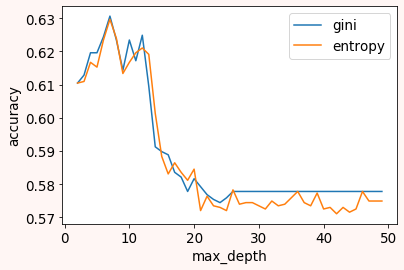

In [30]:
# We will attempt to prune the DecisionTree on the 
# max_depth parameter, on both 'gini' and 'entropy' 

max_depth = []
acc_gini = []
acc_entropy = []
for i in range(2,50):
    dtree = DecisionTreeClassifier(random_state=0,criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_valid)
    acc_gini.append(accuracy_score(y_valid, pred))
    ###
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_valid)
    acc_entropy.append(accuracy_score(y_valid, pred))
    ####
    max_depth.append(i)
    d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

In [31]:
clf = DecisionTreeClassifier(random_state=0,max_depth=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_valid)
test3 = clf.predict_proba(X_valid)
accuracy_score(y_valid, y_pred)

0.6306436119116234

In [32]:
cm = pd.DataFrame(confusion_matrix(y_pred, y_valid))
cm.columns = ['True Y=0','True Y=1']
cm.index = ['Predicted Y=0','Predicted Y=1']
display(cm)
specificity = cm.iloc[0, 0]/(cm.iloc[0, 0] + cm.iloc[1, 0])
print("Accuracy:",round(accuracy_score(y_valid, y_pred),4))
print('Specificity:', round(specificity,4))
print('Sensitivity',round(recall_score(y_valid,y_pred),4))
print('F1-Score:', round(f1_score(y_valid,y_pred),4))
print('AUC:',round(roc_auc_score(y_valid, y_pred),4))
feature_imp(clf,X_train)

,True Y=0,True Y=1
Predicted Y=0,621,388
Predicted Y=1,381,692


Accuracy: 0.6306
Specificity: 0.6198
Sensitivity 0.6407
F1-Score: 0.6428
AUC: 0.6303


[('Age', 0.398),
 ('PhotoAmt', 0.149),
 ('FurLength', 0.089),
 ('Type', 0.085),
 ('MaturitySize', 0.085),
 ('is_sterilized', 0.056),
 ('Dewormed', 0.036),
 ('Gender', 0.032),
 ('unknown_sterilized', 0.02),
 ('Vaccinated', 0.014),
 ('fee_cat', 0.013),
 ('Health', 0.01),
 ('video_cat', 0.009),
 ('purebreed', 0.005)]

In [33]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = clf.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = clf.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 195 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 1] <= 2.5 else to node 106.
	node=1 test node: go to node 2 if X[:, 0] <= 1.5 else to node 59.
		node=2 test node: go to node 3 if X[:, 2] <= 1.5 else to node 34.
			node=3 test node: go to node 4 if X[:, 6] <= 2.5 else to node 19.
				node=4 test node: go to node 5 if X[:, 1] <= 0.5 else to node 12.
					node=5 test node: go to node 6 if X[:, 5] <= 1.5 else to node 9.
						node=6 test node: go to node 7 if X[:, 8] <= 6.5 else to node 8.
							node=7 leaf node.
							node=8 leaf node.
						node=9 test node: go to node 10 if X[:, 10] <= 1.5 else to node 11.
							node=10 leaf node.
							node=11 leaf node.
					node=12 test node: go to node 13 if X[:, 8] <= 6.5 else to node 16.
						node=13 test node: go to node 14 if X[:, 13] <= 0.5 else to node 15.
							node=14 leaf node.
							node=15 leaf node.
						node=16 test node: go to node 17 if X[:, 8] <= 9.5 else to

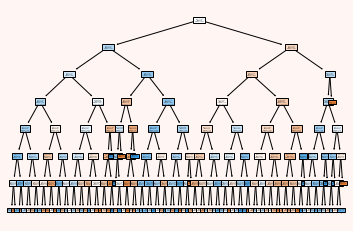

In [34]:
plt.figure()
tree.plot_tree(clf,filled=True)  
plt.savefig('catdog.eps',format='eps',bbox_inches = "tight")

In [35]:
dotfile = open("catdog.dot", 'w')
tree.export_graphviz(clf,out_file = dotfile,
                     feature_names=feature_cols,
                     class_names = [str(i) for i in clf.classes_],
                     proportion=False) 
dotfile.close()

# Easiest way to view the dotfile:
# https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
# 1) exporting it with export_graphviz 
# 2) Open the .dot file in a text editor
# 3) Copy the piece of code and paste it @ webgraphviz.com

Seeing that our Decision Tree performed rather well on the overall dataset, and that we can obtain the important features easily (in a sorted order as well), we decided to use this model for our data on cats and dogs respectively. A split on type on animal was done as we had prior belief that different animal types would have different important attributes building up to their adoptability.

# Section 4.2.1: Decision Trees for Cats

In [36]:
X = np.asarray(cat_df.drop('y',axis=1))
y = np.asarray(cat_df['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [37]:
allcols = cat_df.drop('y',axis=1).columns.tolist()

In [38]:
feature_cols = allcols.copy()

In [39]:
X_train = pd.DataFrame(data=X_train, columns=allcols)

In [40]:
X_train.head()

,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Health,PhotoAmt,purebreed,video_cat,fee_cat,unknown_sterilized,is_sterilized
0,2,2,1,2,2,1,1,3,0,0,0,0,0
1,4,2,1,1,1,1,1,3,1,0,0,0,1
2,3,1,2,1,1,1,1,2,1,0,0,0,0
3,3,2,2,1,2,2,1,1,1,0,0,0,0
4,2,1,1,1,2,2,1,8,1,3,0,0,0


### Constructing the DT for Cats

Best max_depth for gini: 2
Best max_depth for entropy: 6


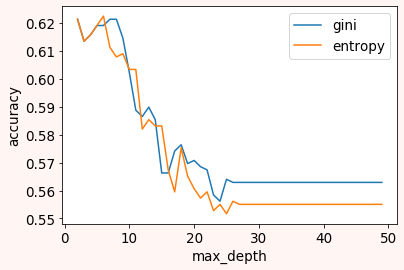

In [41]:
rando = 5
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(2,50):
    dtree = DecisionTreeClassifier(random_state=rando,criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_valid)
    acc_gini.append(accuracy_score(y_valid, pred))
    ###
    dtree = DecisionTreeClassifier(random_state=rando,criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_valid)
    acc_entropy.append(accuracy_score(y_valid, pred))
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
best_gini = d.sort_values('acc_gini',ascending=False).iloc[0,2]
best_entro = d.sort_values('acc_entropy',ascending=False).iloc[0,2]
print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

In [42]:
# Best for gini: look at accuracy scores in that region
acc_gini = {}
for i in range(best_gini-1,best_gini+5):
    clf3 = DecisionTreeClassifier(random_state=rando,max_depth= i , criterion = 'gini')
    clf3 .fit(X_train,y_train)
    y_pred = clf3 .predict(X_valid)
    test3 = clf3 .predict_proba(X_valid)
    acc_gini[i] = accuracy_score(y_valid, y_pred)
acc_gini

{1: 0.6056179775280899,
 2: 0.6213483146067416,
 3: 0.6134831460674157,
 4: 0.6157303370786517,
 5: 0.6191011235955056,
 6: 0.6191011235955056}

In [43]:
# Best for entropy: look at accuracy scores in that region
acc_entro = {}
for i in range(best_entro,best_entro+5):
    clf3 = DecisionTreeClassifier(random_state=rando, max_depth= i , criterion = 'entropy')
    clf3 .fit(X_train,y_train)
    y_pred = clf3 .predict(X_valid)
    test3 = clf3 .predict_proba(X_valid)
    acc_entro[i] = accuracy_score(y_valid, y_pred)
acc_entro

{6: 0.6224719101123596,
 7: 0.6112359550561798,
 8: 0.6078651685393258,
 9: 0.6089887640449438,
 10: 0.6033707865168539}

In [44]:
# Being aware of the tradeoff between the max_depth and 
# representation power, we chose to use our criterion as 'entropy'
# as it generally gives the best accuracy and a max_depth of 6 
# as it gives near the optimal accuracy score,
# and takes more features into account for better specialization

clf3 = DecisionTreeClassifier(random_state = rando, 
                              max_depth = best_entro , 
                              criterion = 'entropy')
clf3 .fit(X_train,y_train)
y_pred = clf3 .predict(X_valid)
test3 = clf3 .predict_proba(X_valid)
accuracy_score(y_valid, y_pred)

0.6224719101123596

In [45]:
n_nodes = clf3.tree_.node_count
children_left = clf3.tree_.children_left
children_right = clf3.tree_.children_right
feature = clf3.tree_.feature
threshold = clf3.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = clf3.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = clf3.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 103 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 2.5 else to node 46.
	node=1 test node: go to node 2 if X[:, 7] <= 0.5 else to node 21.
		node=2 test node: go to node 3 if X[:, 0] <= 0.5 else to node 10.
			node=3 test node: go to node 4 if X[:, 4] <= 1.5 else to node 5.
				node=4 leaf node.
				node=5 test node: go to node 6 if X[:, 1] <= 1.5 else to node 7.
					node=6 leaf node.
					node=7 test node: go to node 8 if X[:, 3] <= 2.0 else to node 9.
						node=8 leaf node.
						node=9 leaf node.
			node=10 test node: go to node 11 if X[:, 5] <= 1.5 else to node 16.
				node=11 test node: go to node 12 if X[:, 10] <= 1.5 else to node 15.
					node=12 test node: go to node 13 if X[:, 6] <= 1.5 else to node 14.
						node=13 leaf node.
						node=14 leaf node.
					node=15 leaf node.
				node=16 test node: go to node 17 if X[:, 8] <= 0.5 else to node 20.
					node=17 test node: go to node 18 if X[:, 3] <= 1.5 el

In [46]:
cm = pd.DataFrame(confusion_matrix(y_pred, y_valid))
cm.columns = ['True Y=0','True Y=1']
cm.index = ['Predicted Y=0','Predicted Y=1']
display(cm)
specificity = cm.iloc[0, 0]/(cm.iloc[0, 0] + cm.iloc[1, 0])
print("Accuracy:",round(accuracy_score(y_valid, y_pred),4))
print('Specificity:', round(specificity,4))
print('Sensitivity',round(recall_score(y_valid,y_pred),4))
print('F1-Score:', round(f1_score(y_valid,y_pred),4))
print('AUC:',round(roc_auc_score(y_valid, y_pred),4))
feature_imp(clf3,X_train)

,True Y=0,True Y=1
Predicted Y=0,209,161
Predicted Y=1,175,345


Accuracy: 0.6225
Specificity: 0.5443
Sensitivity 0.6818
F1-Score: 0.6725
AUC: 0.613


[('Age', 0.528),
 ('PhotoAmt', 0.154),
 ('FurLength', 0.092),
 ('is_sterilized', 0.06),
 ('unknown_sterilized', 0.03),
 ('MaturitySize', 0.024),
 ('fee_cat', 0.023),
 ('Dewormed', 0.022),
 ('Gender', 0.018),
 ('Health', 0.018),
 ('purebreed', 0.012),
 ('Vaccinated', 0.009),
 ('video_cat', 0.009)]

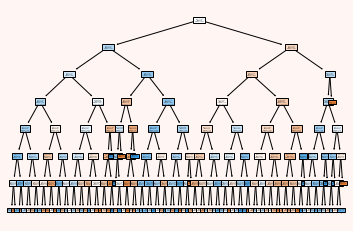

In [47]:
plt.figure()
tree.plot_tree(clf,filled=True)  
plt.savefig('decisiontree.eps',format='eps',bbox_inches = "tight")

In [48]:
dotfile = open("cat.dot", 'w')
tree.export_graphviz(clf3,out_file = dotfile,
                     feature_names=feature_cols,
                     class_names = [str(i) for i in clf3.classes_],
                     proportion=False) 
dotfile.close()

# Easiest way to view the dotfile:
# https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
# 1) exporting it with export_graphviz 
# 2) Open the .dot file in a text editor
# 3) Copy the piece of code and paste it @ webgraphviz.com

# Section 4.2.2: Evaluation for Cats: Classifying on Test Set

In [49]:
y_pred = clf3.predict(X_test)
test3 = clf3.predict_proba(X_test)
accuracy_score(y_test, y_pred)

cm = pd.DataFrame(confusion_matrix(y_pred, y_test))
cm.columns = ['True Y=0','True Y=1']
cm.index = ['Predicted Y=0','Predicted Y=1']
display(cm)
specificity = cm.iloc[0, 0]/(cm.iloc[0, 0] + cm.iloc[1, 0])
print("Accuracy:",round(accuracy_score(y_test, y_pred),4))
print('Specificity:', round(specificity,4))
print('Sensitivity',round(recall_score(y_test,y_pred),4))
print('F1-Score:', round(f1_score(y_test,y_pred),4))
print('AUC:',round(roc_auc_score(y_test, y_pred),4))
feature_imp(clf3,X_train)

,True Y=0,True Y=1
Predicted Y=0,133,80
Predicted Y=1,102,180


Accuracy: 0.6323
Specificity: 0.566
Sensitivity 0.6923
F1-Score: 0.6642
AUC: 0.6291


[('Age', 0.528),
 ('PhotoAmt', 0.154),
 ('FurLength', 0.092),
 ('is_sterilized', 0.06),
 ('unknown_sterilized', 0.03),
 ('MaturitySize', 0.024),
 ('fee_cat', 0.023),
 ('Dewormed', 0.022),
 ('Gender', 0.018),
 ('Health', 0.018),
 ('purebreed', 0.012),
 ('Vaccinated', 0.009),
 ('video_cat', 0.009)]

We note that Sterilized can be treated as looking at the sterility, hence during our analysis we would treat the two as one attribute again.

# Section 4.2.3: Key Findings for Cats (DT)

In [50]:
cat_df

,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Health,PhotoAmt,y,purebreed,video_cat,fee_cat,unknown_sterilized,is_sterilized
0,2,1,1,1,2,2,1,1.0,1,1,0,3,0,0
1,0,1,2,2,3,3,1,2.0,1,1,0,0,1,0
5,2,2,2,1,2,2,1,2.0,1,1,0,0,0,0
6,4,1,2,3,2,2,1,3.0,1,0,0,3,1,0
8,1,2,2,2,2,2,1,6.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,3,1,3,2,3,1,1,1.0,0,1,0,0,0,0
14972,1,1,2,1,2,1,1,3.0,1,1,0,0,0,0
14977,2,2,1,2,2,2,1,2.0,0,1,0,0,0,0
14986,0,2,2,1,2,1,1,1.0,0,1,0,0,0,0


In [51]:
cat_feat = ['Age', 'PhotoAmt', 'FurLength', 'is_sterilized', 'MaturitySize']
def plot_bar(data, x):
    y = 'y'
    df1 = data.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
                  
    g.ax.set_ylim(0,100)
  

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)


In [52]:
def plot_bar_special(data, x): # same function as before
    y = 'y'
    df1 = data.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.set(xticklabels=[])
      #  g.ax.text(txt_x,txt_y,txt)

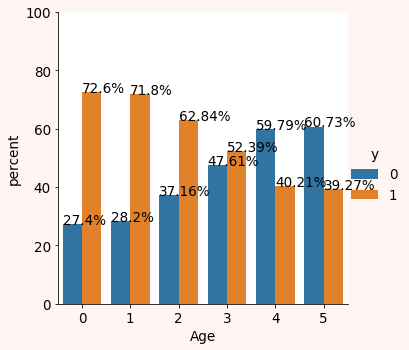

In [53]:
plot_bar(cat_df, 'Age')
# A good sign that this mutation of age is significant: 
# younger animals have a much higher chance of adoption
# and there is a correlation with age and % adopted

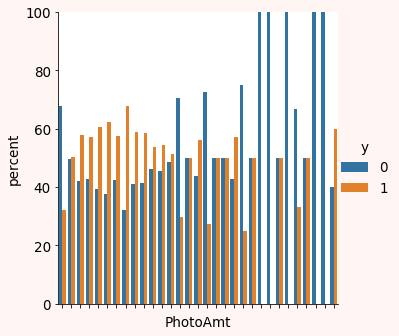

In [54]:
plot_bar_special(cat_df, 'PhotoAmt')

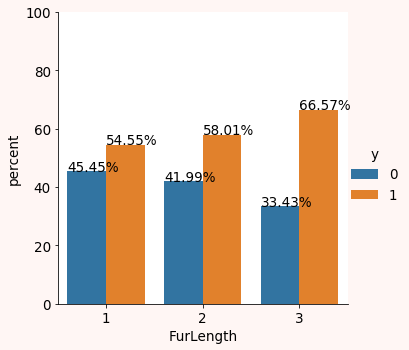

In [55]:
plot_bar(cat_df, 'FurLength')

# Longer Furlength seems to be more appearling,
# as seen by the % of y=1 increasing as FurLength increase
# it could imply: fluffy and furry cats are more attractive
# as compared to bare-skined ones

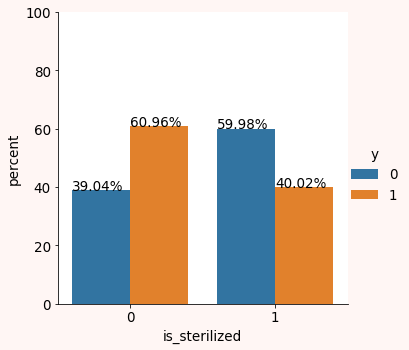

In [56]:
plot_bar(cat_df, 'is_sterilized')
# Strong contrast in percentages:
# Not sterilized tends to be adopted more often

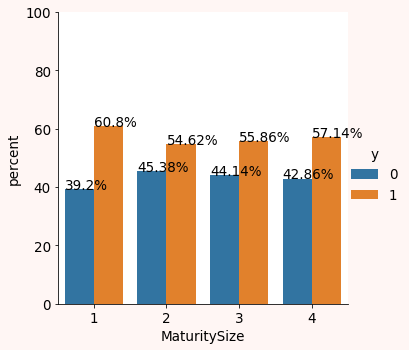

In [57]:
plot_bar(cat_df, 'MaturitySize')

# major difference for small cats, where cats of the smallest size
# are heavily favoured, but sizes larger than that are equally distributed

# Section 4.2.4 Decision Trees for Dogs

In [58]:
X = np.asarray(dog_df.drop('y',axis=1))
y = np.asarray(dog_df['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [59]:
allcols = dog_df.drop('y',axis=1).columns.tolist()

In [60]:
X_train = pd.DataFrame(data=X_train, columns=allcols)

### Constructing the DT for Dogs

Best max_depth for gini: 8
Best max_depth for entropy: 8


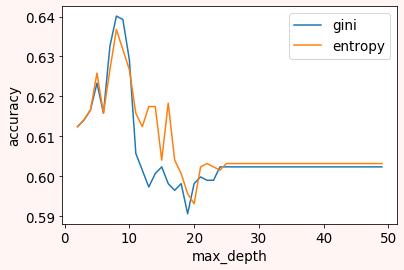

In [61]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(2,50):
    dtree = DecisionTreeClassifier(random_state=rando,criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_valid)
    acc_gini.append(accuracy_score(y_valid, pred))
    ###
    dtree = DecisionTreeClassifier(random_state=rando,criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_valid)
    acc_entropy.append(accuracy_score(y_valid, pred))
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
dog_best_gini = d.sort_values('acc_gini',ascending=False).iloc[0,2]
dog_best_entr = d.sort_values('acc_entropy',ascending=False).iloc[0,2]
print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

In [62]:
# Best for gini: look at accuracy scores in that region
acc_gini = {}

for i in range(dog_best_gini-3,dog_best_gini+3):
    clf3 = DecisionTreeClassifier(random_state=rando, max_depth= i , criterion = 'gini')
    clf3 .fit(X_train,y_train)
    y_pred = clf3 .predict(X_valid)
    test3 = clf3 .predict_proba(X_valid)
    acc_gini[i] = accuracy_score(y_valid, y_pred)
acc_gini

{5: 0.6233221476510067,
 6: 0.6157718120805369,
 7: 0.6325503355704698,
 8: 0.6401006711409396,
 9: 0.639261744966443,
 10: 0.6291946308724832}

In [63]:
# Best for gini: look at accuracy scores in that region
acc_entro = {}
for i in range(dog_best_entr-3,dog_best_entr+3):
    clf3 = DecisionTreeClassifier(random_state=rando,max_depth= i , criterion = 'entropy')
    clf3 .fit(X_train,y_train)
    y_pred = clf3.predict(X_valid)
    test3 = clf3.predict_proba(X_valid)
    acc_entro[i] = accuracy_score(y_valid, y_pred)
acc_entro

{5: 0.6258389261744967,
 6: 0.6157718120805369,
 7: 0.6266778523489933,
 8: 0.636744966442953,
 9: 0.6317114093959731,
 10: 0.6266778523489933}

In [64]:
acc_entro[8] - acc_entro[9]

0.005033557046979831

In [65]:
# Being aware of the tradeoff between the max_depth and representation power,
# we chose to use our criterion as 'entropy' as it generally gives the best accuracy
# and a max_depth of 8 as it gives the optimal accuracy score
# and has a significance difference greater than its neighbors
# (by more than 0.005)

clf5 = DecisionTreeClassifier(random_state=rando, 
                              max_depth= dog_best_entr, 
                              criterion = 'entropy')
clf5 .fit(X_train,y_train)
y_pred = clf5.predict(X_valid)
test5 = clf5.predict_proba(X_valid)
accuracy_score(y_valid, y_pred)

0.636744966442953

In [66]:
n_nodes = clf5.tree_.node_count
children_left = clf5.tree_.children_left
children_right = clf5.tree_.children_right
feature = clf5.tree_.feature
threshold = clf5.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = clf5.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = clf5.apply(X_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 317 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 1.5 else to node 146.
	node=1 test node: go to node 2 if X[:, 4] <= 2.5 else to node 91.
		node=2 test node: go to node 3 if X[:, 4] <= 1.5 else to node 46.
			node=3 test node: go to node 4 if X[:, 7] <= 7.5 else to node 31.
				node=4 test node: go to node 5 if X[:, 3] <= 1.5 else to node 18.
					node=5 test node: go to node 6 if X[:, 11] <= 0.5 else to node 13.
						node=6 test node: go to node 7 if X[:, 7] <= 5.5 else to node 10.
							node=7 test node: go to node 8 if X[:, 2] <= 1.5 else to node 9.
								node=8 leaf node.
								node=9 leaf node.
							node=10 test node: go to node 11 if X[:, 5] <= 1.5 else to node 12.
								node=11 leaf node.
								node=12 leaf node.
						node=13 test node: go to node 14 if X[:, 7] <= 2.5 else to node 17.
							node=14 test node: go to node 15 if X[:, 2] <= 1.5 else to node 16.
								node=15 leaf node.
								

In [67]:
cm = pd.DataFrame(confusion_matrix(y_pred, y_valid))
cm.columns = ['True Y=0','True Y=1']
cm.index = ['Predicted Y=0','Predicted Y=1']
display(cm)
specificity = cm.iloc[0, 0]/(cm.iloc[0, 0] + cm.iloc[1, 0])
print("Accuracy:",round(accuracy_score(y_valid, y_pred),4))
print('Specificity:', round(specificity,4))
print('Sensitivity',round(recall_score(y_valid,y_pred),4))
print('F1-Score:', round(f1_score(y_valid,y_pred),4))
print('AUC:',round(roc_auc_score(y_valid, y_pred),4))
feature_imp(clf5,X_train)

,True Y=0,True Y=1
Predicted Y=0,452,251
Predicted Y=1,182,307


Accuracy: 0.6367
Specificity: 0.7129
Sensitivity 0.5502
F1-Score: 0.5864
AUC: 0.6316


[('Age', 0.222),
 ('PhotoAmt', 0.161),
 ('MaturitySize', 0.112),
 ('FurLength', 0.104),
 ('is_sterilized', 0.061),
 ('Vaccinated', 0.06),
 ('Gender', 0.053),
 ('purebreed', 0.05),
 ('unknown_sterilized', 0.05),
 ('Dewormed', 0.045),
 ('Health', 0.032),
 ('fee_cat', 0.025),
 ('video_cat', 0.024)]

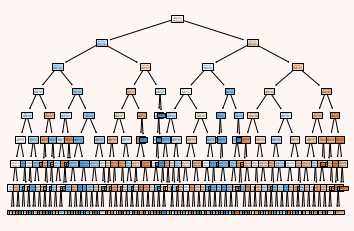

In [68]:
plt.figure()
tree.plot_tree(clf5,filled=True)  
plt.savefig('decisiontree.eps',format='eps',bbox_inches = "tight")

In [69]:
dotfile = open("dog.dot", 'w')
tree.export_graphviz(clf5,out_file = dotfile,
                     feature_names=feature_cols,
                     class_names = [str(i) for i in clf5.classes_],
                     proportion=False) 
dotfile.close()

# Easiest way to view the dotfile:
# https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
# 1) exporting it with export_graphviz 
# 2) Open the .dot file in a text editor
# 3) Copy the piece of code and paste it @ webgraphviz.com

# Section 4.2.5: Evaluation for Dogs: Classifying on Test Set

In [70]:
y_pred = clf5.predict(X_test)
test5 = clf5.predict_proba(X_test)
accuracy_score(y_test, y_pred)

cm = pd.DataFrame(confusion_matrix(y_pred, y_test))
cm.columns = ['True Y=0','True Y=1']
cm.index = ['Predicted Y=0','Predicted Y=1']
display(cm)
specificity = cm.iloc[0, 0]/(cm.iloc[0, 0] + cm.iloc[1, 0])
print("Accuracy:",round(accuracy_score(y_test, y_pred),4))
print('Specificity:', round(specificity,4))
print('Sensitivity',round(recall_score(y_test,y_pred),4))
print('F1-Score:', round(f1_score(y_test,y_pred),4))
print('AUC:',round(roc_auc_score(y_test, y_pred),4))
feature_imp(clf5,X_train)

,True Y=0,True Y=1
Predicted Y=0,228,142
Predicted Y=1,118,175


Accuracy: 0.6078
Specificity: 0.659
Sensitivity 0.5521
F1-Score: 0.5738
AUC: 0.6055


[('Age', 0.222),
 ('PhotoAmt', 0.161),
 ('MaturitySize', 0.112),
 ('FurLength', 0.104),
 ('is_sterilized', 0.061),
 ('Vaccinated', 0.06),
 ('Gender', 0.053),
 ('purebreed', 0.05),
 ('unknown_sterilized', 0.05),
 ('Dewormed', 0.045),
 ('Health', 0.032),
 ('fee_cat', 0.025),
 ('video_cat', 0.024)]

# Section 4.2.6: Key Findings for Dogs (DT)

In [71]:
dog_df

,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Health,PhotoAmt,y,purebreed,video_cat,fee_cat,unknown_sterilized,is_sterilized
2,0,1,2,2,1,1,1,7.0,0,1,0,0,0,0
3,3,2,2,1,1,1,1,8.0,1,1,0,3,0,0
4,0,1,2,1,2,2,1,3.0,1,1,0,0,0,0
10,1,1,2,1,2,1,1,7.0,1,1,0,0,0,0
12,1,1,2,3,1,1,1,1.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14983,2,1,2,2,1,1,1,7.0,1,1,0,0,0,0
14984,5,2,2,2,3,3,1,1.0,0,1,0,0,1,0
14985,5,1,2,2,3,3,1,0.0,0,0,0,0,0,0
14987,3,2,1,3,1,1,1,1.0,1,1,0,0,0,0


In [72]:
# Important features for Dogs
dog_feat = ['Age', 'PhotoAmt', 'MaturitySize', 'FurLength', 'is_sterilized']


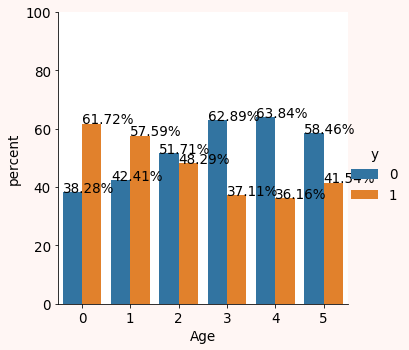

In [73]:
plot_bar(dog_df, 'Age')

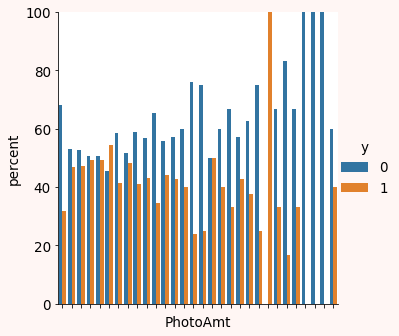

In [74]:
plot_bar_special(dog_df, 'PhotoAmt')

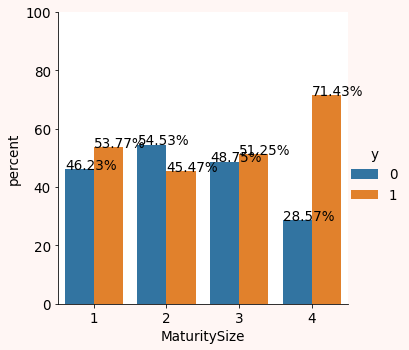

In [75]:
plot_bar(dog_df, 'MaturitySize')

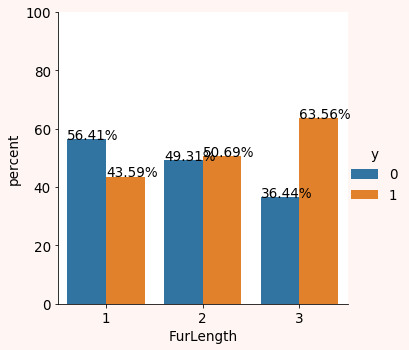

In [76]:
plot_bar(dog_df, 'FurLength')

# Similar to cats, longer Furlength seems to be more appearing,
# as seen by the % of y=1 increasing as FurLength increase
# it could imply: fluffy and furry dogs are more attractive
# as compared to bare-skinned ones

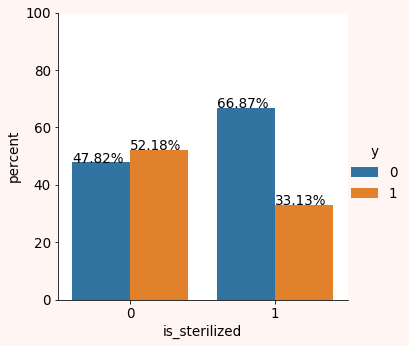

In [77]:
plot_bar(dog_df, 'is_sterilized')

# Section 4.3: Overall Discussion for Decision Trees

Besides Maturity Size, all other important attributes were common in both Cats and Dogs. We note that they vary in the order of importance, where some attributes bear more weight depending on the type of animal. We analyzed their distributions separately for each of these features and realized that they are very identical. Hence, a combined evaluation is depicted below, to reduce repetition.

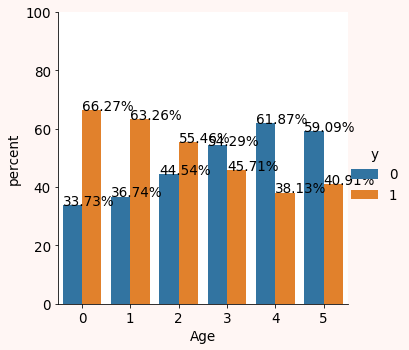

In [78]:
plot_bar(test_df, 'Age')

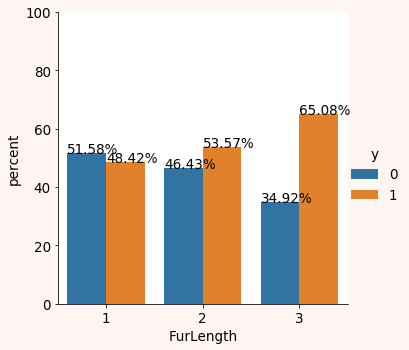

In [79]:
plot_bar(test_df, 'FurLength')

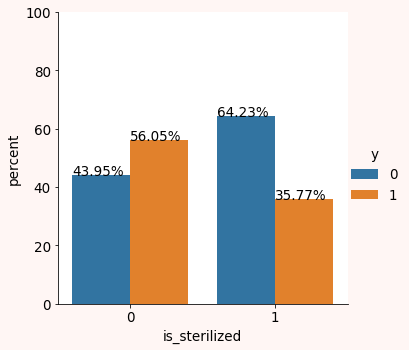

In [80]:
plot_bar(test_df, 'is_sterilized')

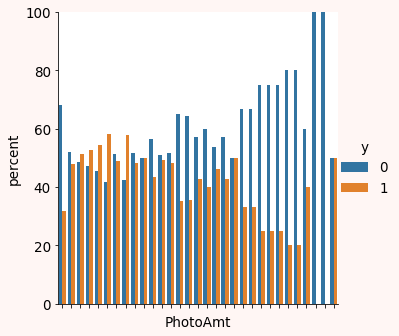

In [81]:
plot_bar_special(test_df, 'PhotoAmt')

Surprisingly, pets with a smaller amount of photos tend to be adopted more often. However, we note that when pets have no photos at all, their chances of adoption are much lower, emphasizing the importance of our CV model to derive more significant insights.